# SVM
## Kernels
Los kernels son "trucos", medidas que nos ayudan a combatir el problema de clusters no separables linealmente.

Para introducir el concepto comenzamos desde un modelo muy simple. Datos en un modelo uni-dimensional.



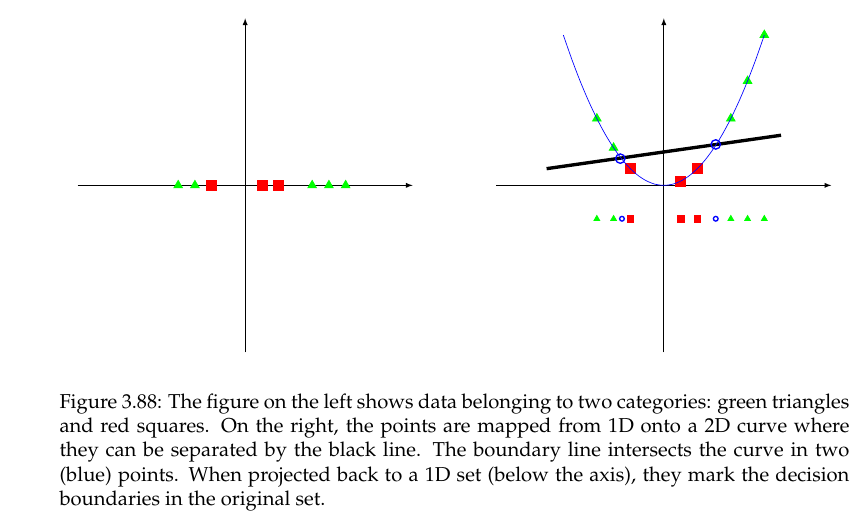

En la Figura 3.88 tenemos dos clusters de puntos. Triangulos verdes y cuadrados rojos. Como los separamos? no son liealmente separables.

El truco para convertirlos en clusters linealmente separables es llevarlos a una dimensiona $n+1$ mas alta, con un mapeo. En este caso pensemos en el mapeo $y=x^2$ (una parabola). Cada punto $x^{(i)}$, se convierte en nuevo punto $(x^{(i)}, (x^{(i)})^2)$.
Estamos convirtiendo un conjunto uni-dimenasional en un un conjunto bi-dimensional (pasando de 1 dimension a dos dimensiones). En La Figura 3.88 se ve claramente que en este nuevo espacio los clusters son separables linealmente.


Que pasa si todos los puntos estan a un solo de la grafica?

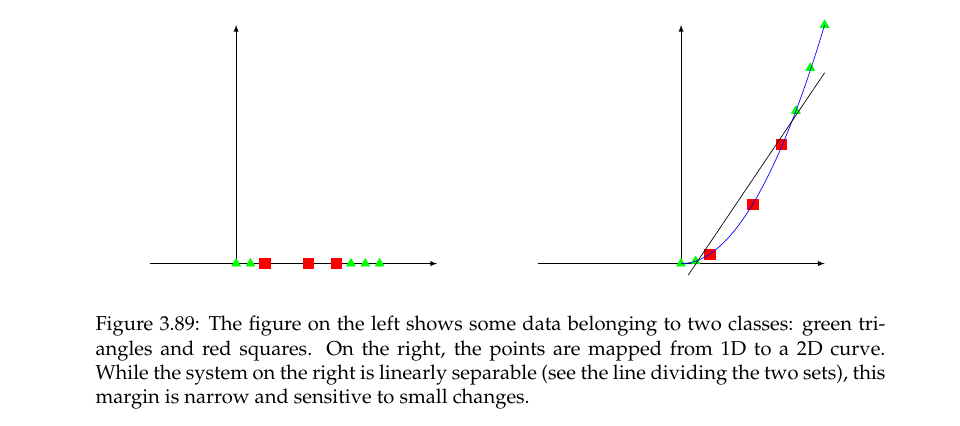

En la Figura 3.89 se ve claramente que el margen que separa los dos clusters es muy reducido. Entonces hay un nuevo "truco".
El truco es mover todos los puntos restandole la media.
Es decir, si $\mu = \frac1m \sum_{i=1}^m  x_i$. Ahora cada punto
es de la forma $x_i \leftarrow x_i - \mu$.
Los nuevos puntos $x_i$ tiene un buen balance con 0 como la media. Estan **centrados** y el margen es mayor cuando se proyectan al espacio de dos dimensiones mediante la transformacion. (**lifting**)

\begin{eqnarray}
k : \mathbb{R} &\to& \mathbb{R}^2 \\
    x_i &\mapsto& (x_i - \mu)^2
\end{eqnarray}
$k$ es un kernel.
Los nuevos puntos $(x_i - \mu, (x_i- \mu)^2)$ son linealmente separables.

Que tal si los puntos estan en dos dimensiones.






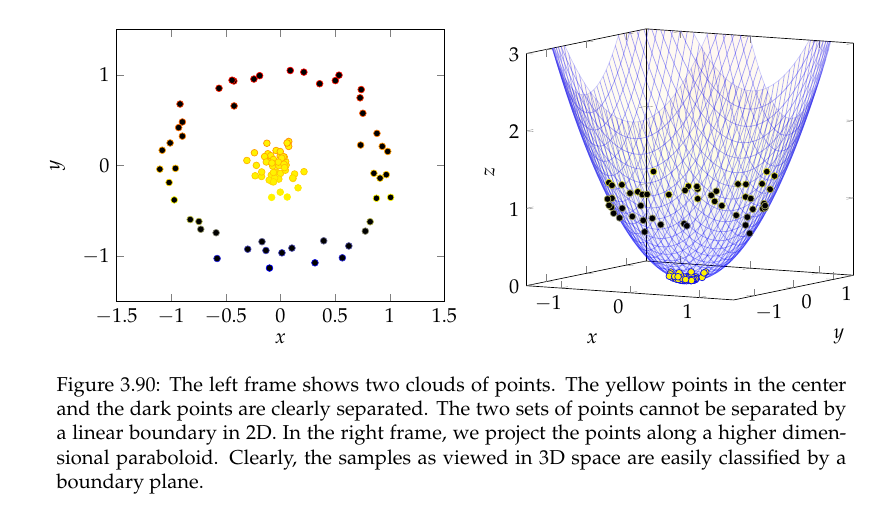

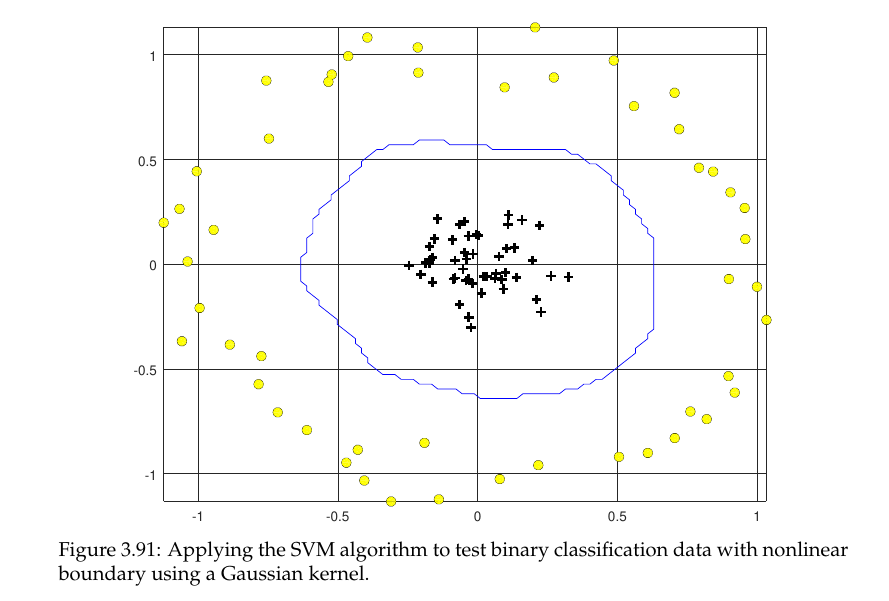

En este caso hacemos el **lifting** de 2D a 3D mediante el mapeo (funcion).


\begin{eqnarray}
k: \mathbb{R}^2 &\to& \mathbb{R}^3 \\
\binom{x_{i1}}{x_{i2}} &  \mapsto& \begin{pmatrix}
x_{i1} \\
x_{i2} \\
({x_{i1}-\mu_1})^2 + (x_{i2}-\mu_2)^2 \end{pmatrix} \\
\end{eqnarray}

De todas formas estos metodos pueden resultar costos cuando las dimensiones son muchas, existe un metodo que se llama el **kernel trick** creado por Isabelle Guyon. Lo vemos en la proxima clase. Este truco permite una simplificaion grande en el numero de computos cuando se "backproject" (se elevan "lifting") a dimensiones mayores. Esto impulso mucho el SVM.

# Retomamos el problema de optimizacion como multiplicadores de Lagrange.
Y lo convertimos a un problema **dual** en otras variables (los multiplicadores de Lagrange) el cual es mas facil de resolver.


Inicialmente formulamos el siguiente problema.

$$\text{minimizar   } J(w) = \frac{\| w \|^2}{2}.$$
$$\text{sujeto  } y_i (w^T x_i - b) \ge 1 \quad , \quad i=1,2, \cdots, m .$$
Lo podemos escribir tambien

$$\text{minimizar   } J(w) = \frac{\| w \|^2}{2}.$$
$$\text{sujeto  } y_i (w^T x_i - b)- 1 \ge 0 \quad , \quad i=1,2, \cdots, m .$$

Este problema que estamos viendo tiene la forma

$$\min_{\theta} f(\theta) \quad \text{sujeto a} .$$
$$ g_i( \theta) \ge 0.$$

Este problema se resuelve cuando la combinacion (Lagrangiano, no de la mecanica) mostrada abajo

$$L(\theta, \lambda) = f(\theta) - \sum_i \lambda_i g_i(\theta) .$$
es estacionaria. Es decir, cuando el gradiente $\nabla_{\theta,\lambda} L(\theta, \lambda) = 0$

Vamos a obtner el gradiente con respecto a  $w, b, \lambda$.

$$L(w, b, \lambda) = \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1] .$$



Comenzamos con el gradiente con respecto a $L$.


$$\nabla_{w} L(w, b, \lambda) = \nabla_w \left [ \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1] \right ].$$

Vamos por partes: El primer termino.


$$ \frac{\partial }{\partial w_j}  \left ( \frac12 \| w \|^2   \right )  = \frac{\partial }{\partial w_j} \left ( \frac12 \sum_i w_i^2  \right ) = \sum_i w_i \frac{\partial w_i}{\partial w_j} = \sum_i w_i \delta_{ij} = w_j.$$

Para el segundo termino:

\begin{eqnarray}
\frac{\partial }{\partial w_j} \left (  \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1]  \right ) &=&
\frac{\partial }{\partial w_j}
 \left ( \sum_i \lambda_i  \left [ y_i \left ( \sum_k w_k (x_i)_k  - b
  \right ) -1
     \right ]  \right ) \\
&=&  \sum_i \lambda_i  \left [ y_i \left ( \sum_k
\frac{\partial w_k}{\partial w_j} (x_i)_k   
  \right )
     \right ]   \\
&=&  \sum_i \lambda_i  \left [ y_i \left ( \sum_k
 \delta_{kj} (x_i)_k   
  \right )
     \right ]   \\
&=& \sum_i \lambda_i y_i (x_i)_j
\end{eqnarray}

Tomando los terminos


$$\nabla_w L(w, b, \lambda) = w_j - \sum_i \lambda_i y_i (x_i)_j
 = 0$$

Esta ecuacion implica

$$w = \sum_i \lambda_i y_i x_i \tag{1} .$$
Note que $\lambda_i, y_i$ son escalares peor $x_i$ es vector en $\mathbb{R}^n$.

Ahora tomamos el gradiente con respecto a $b$. El gradiente del primer termino es 0.

Es decir

$$\frac{\partial }{\partial b} \left ( \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1 \right ) = -\sum_i \lambda_i y_i = 0.$$
Es decir

$$\sum_i \lambda_i y_i = 0 .$$

Vamos a **eliminar** la variable $w$, del lagrangiano.


Reemplazaos $w$ por el valor en Equacion (1)
\begin{eqnarray}
 \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1] &=&
 \frac12 w \cdot w -  \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1]  \\
 &=& \frac12  \sum_i \lambda_i y_i x_i \cdot  \sum_i \lambda_i y_i x_i -  \sum_j \lambda_i \left [ y_i \left (  \sum_i \lambda_i y_i x_i \cdot x_i - b \right ) - 1 \right ]  \\
 &=& \frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j  - \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j  + \sum_i \lambda_i y_i b  + \sum_i \lambda_i \\
 &=& -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum_i \lambda_i
\end{eqnarray}
Sujeto  $\sum \lambda_i y_i = 0$.












El probelma **dual**


$$ L(\lambda) = -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum  \lambda_j \tag{2}.$$
sujeto a
$$ \sum_i \lambda_i y_i = 0 .$$

Note los productos internos $x_i \cdot x_j$ pueden ser costosos,
cuando se haga el mapping (kernel). Por que tendriamos que calcular

$$ k( x_i) \cdot k(x_j)$$.
Aca es donde el **kernel trick** funciona y lo vamos  a ver en la proxima clase.

La ecuacion (2) es cuadratica en $\lambda_i$, se puede derivar
e igualar a 0 y queda un sistema lineal de ecuaciones en $\lambda_i$ que es facil de resolver.

Una vez resolvamos este sistema dual por $\lambda$ usamos la Ecuacion (1) y obtenemos $w$ falta obtener $b$. Esto es tarea.





# Proxima clase: El Kernel Trick